<a href="https://colab.research.google.com/github/RoshanPanda/pytorch/blob/master/malaria_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!cd /root/
!mkdir /root/.kaggle
!ls -lart /root/

total 72
-rw-r--r-- 1 root root  148 Aug 17  2015 .profile
-rw-r--r-- 1 root root 3106 Apr  9  2018 .bashrc
drwxr-xr-x 3 root root 4096 Apr 25 16:08 .gsutil
drwxr-xr-x 1 root root 4096 Apr 25 16:39 .ipython
drwx------ 1 root root 4096 Apr 25 16:39 .local
drwx------ 2 root root 4096 Apr 25 16:39 .jupyter
drwxr-xr-x 4 root root 4096 Apr 25 16:40 .npm
drwxr-xr-x 3 root root 4096 Apr 25 16:40 .node-gyp
drwx------ 4 root root 4096 Apr 25 16:41 .config
drwx------ 1 root root 4096 Apr 25 16:42 .cache
drwxr-xr-x 1 root root 4096 Apr 28 14:08 ..
drwxr-xr-x 4 root root 4096 Apr 28 14:08 .forever
drwxr-xr-x 2 root root 4096 Apr 28 14:08 .keras
drwxr-xr-x 2 root root 4096 Apr 28 14:10 .kaggle
drwx------ 1 root root 4096 Apr 28 14:10 .


In [0]:
from google.colab import files


In [3]:
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"roshanpanda","key":"39ae0235263ae36257554f1f4736e823"}'}

In [0]:

!mv /content/kaggle.json /root/.kaggle/

!chmod 600 /root/.kaggle/kaggle.json

In [0]:
import kaggle

In [6]:
cd /content/sample_data/

/content/sample_data


In [7]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 95% 321M/337M [00:02<00:00, 117MB/s]
100% 337M/337M [00:02<00:00, 124MB/s]


In [0]:
from zipfile import ZipFile
with ZipFile("cell-images-for-detecting-malaria.zip", "r") as file:
  file.extractall()
  file.close()

In [0]:

#importing dependancies

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import matplotlib.pyplot as plt
import os
from torch.optim import lr_scheduler

In [0]:
#Transformations for data Augumentation
data_transforms=transforms.Compose([transforms.RandomResizedCrop(224),
                               transforms.RandomHorizontalFlip(),
                               transforms.ToTensor(),
                               transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])

In [11]:
data_dir='/content/sample_data'
image_datasets=datasets.ImageFolder(os.path.join(data_dir,'cell_images'),data_transforms)
dataloaders = torch.utils.data.DataLoader(image_datasets,batch_size=4,shuffle=True)
dataset_sizes=len(image_datasets)
class_names=image_datasets.classes
print("class name is {}".format(class_names))
print("there are {} number of training batches".format(len(dataloaders)))
print("there are {} no of training images".format(dataset_sizes))


class name is ['Parasitized', 'Uninfected']
there are 6890 number of training batches
there are 27558 no of training images


In [0]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.cnn1=nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1)
  #output size of filters=(input_size(244)-filtersize+2(pading)/stride)+1
    self.batchnorm1=nn.BatchNorm2d(8)
    self.relu=nn.ReLU()
    self.maxpool=nn.MaxPool2d(kernel_size=2)
    self.cnn2=nn.Conv2d(in_channels=8, out_channels=32, kernel_size=5, stride=1, padding=2)
    self.batchnorm2=nn.BatchNorm2d(32)
    self.fc1=nn.Linear(in_features=32*56*56, out_features=244)
    self.dropout=nn.Dropout(p=0.5)
    self.fc2=nn.Linear(in_features=244, out_features=2)
  
  def forward(self,x):
    out=self.cnn1(x)
    out=self.batchnorm1(out)
    out=self.relu(out)
    out=self.maxpool(out)
    out=self.cnn2(out)
    out=self.batchnorm2(out)
    out=self.relu(out)
    out=self.maxpool(out)
    #print(out.shape)
    out=out.view(out.size(0),-1)
    out=self.fc1(out)
    out=self.relu(out)
    out=self.dropout(out)
    out=self.fc2(out)
    return out

In [0]:
model=CNN()
model=model.cuda()

In [0]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [15]:
model.parameters

<bound method Module.parameters of CNN(
  (cnn1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(8, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (batchnorm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=100352, out_features=244, bias=True)
  (dropout): Dropout(p=0.5)
  (fc2): Linear(in_features=244, out_features=2, bias=True)
)>

In [0]:
import cv2, os

infected= os.listdir('/content/sample_data/cell_images/Parasitized/')
uninfected= os.listdir('/content/sample_data/cell_images/Uninfected/')

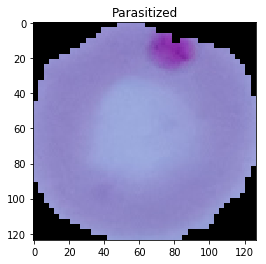

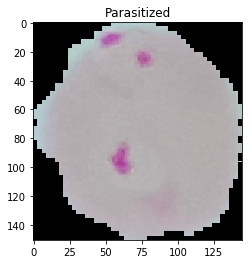

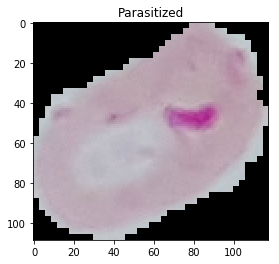

<Figure size 432x288 with 0 Axes>

In [47]:

counti=0
countj=0

for i in infected:
  fig=plt.figure()
  if counti==3:
    break
  image = cv2.imread("/content/sample_data/cell_images/Parasitized/"+i)
  plt.imshow(image)
  plt.title("Parasitized")
  counti+=1     



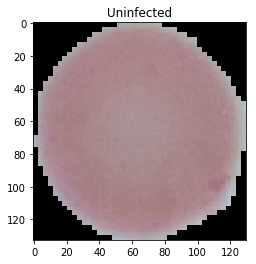

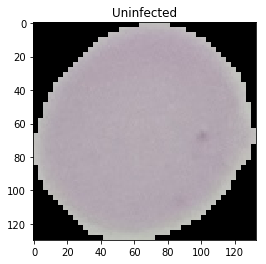

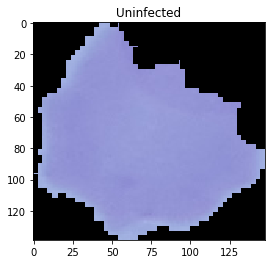

<Figure size 432x288 with 0 Axes>

In [49]:
countj=0
for j in uninfected:
  fig=plt.figure()
  if countj==3:
    break
  image= cv2.imread("/content/sample_data/cell_images/Uninfected/"+j)
  plt.imshow(image)
  plt.title("Uninfected")
  countj+=1

In [17]:
iteration=0
correct=0
#fig=plt.figure(figsize=(10,5))

for inputs, labels in dataloaders:
  if iteration==4:
    break
  inputs=Variable(inputs)
  labels-Variable(labels)
  #print(inputs.data[1])
  if torch.cuda.is_available():
    inputs=inputs.cuda()
    labels=labels.cuda()
  print("input shape:", inputs.size(0))
  print("label shape:", labels.size())
  print("labels are:{}",format(labels))
  output=model.forward(inputs)
  loss=loss_fn(output, labels)
  print("output shape is :",output.size(0))
  print("output tensor ", output)
  
  _, predicted=torch.max(output, 1)
  print("predicted is ", predicted)
  correct += (predicted==labels).sum()
  print("correct predicted is ", correct)
  iteration += 1

input shape: 4
label shape: torch.Size([4])
labels are:{} tensor([1, 0, 0, 1], device='cuda:0')
output shape is : 4
output tensor  tensor([[-0.1715,  0.0042],
        [-0.1170, -0.0557],
        [-0.2906,  0.1870],
        [-0.2089,  0.3153]], device='cuda:0', grad_fn=<AddmmBackward>)
predicted is  tensor([1, 1, 1, 1], device='cuda:0')
correct predicted is  tensor(2, device='cuda:0')
input shape: 4
label shape: torch.Size([4])
labels are:{} tensor([1, 1, 0, 0], device='cuda:0')
output shape is : 4
output tensor  tensor([[-0.0877,  0.0667],
        [-0.0372,  0.1626],
        [-0.1873, -0.0422],
        [ 0.1471,  0.1238]], device='cuda:0', grad_fn=<AddmmBackward>)
predicted is  tensor([1, 1, 1, 0], device='cuda:0')
correct predicted is  tensor(5, device='cuda:0')
input shape: 4
label shape: torch.Size([4])
labels are:{} tensor([0, 1, 0, 0], device='cuda:0')
output shape is : 4
output tensor  tensor([[ 0.0868,  0.0731],
        [-0.0753,  0.1574],
        [-0.2355,  0.0027],
        [-0

In [0]:
lr_scheduler_apply=lr_scheduler.StepLR(optimizer,step_size=8,gamma=.1)

In [23]:
num_epochs=28
for epoch in range(num_epochs):
  lr_scheduler_apply.step()
  correct=0
  for inputs, labels in dataloaders:
    inputs=Variable(inputs)
    labels-Variable(labels)
    if torch.cuda.is_available():
      inputs=inputs.cuda()
      labels=labels.cuda()
    optimizer.zero_grad()
    outputs=model(inputs)
    loss=loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()
    _, predicted=torch.max(outputs, 1)
    correct += (predicted==labels).sum()
    
  training_accuracy=100*correct/dataset_sizes
  print("accuracy at eoch{} is: {}".format(epoch,training_accuracy))

accuracy at eoch0 is: 82
accuracy at eoch1 is: 83
accuracy at eoch2 is: 83
accuracy at eoch3 is: 84
accuracy at eoch4 is: 84
accuracy at eoch5 is: 84
accuracy at eoch6 is: 84
accuracy at eoch7 is: 84
accuracy at eoch8 is: 85
accuracy at eoch9 is: 85
accuracy at eoch10 is: 85
accuracy at eoch11 is: 85
accuracy at eoch12 is: 86
accuracy at eoch13 is: 86
accuracy at eoch14 is: 85
accuracy at eoch15 is: 86
accuracy at eoch16 is: 85
accuracy at eoch17 is: 86
accuracy at eoch18 is: 85
accuracy at eoch19 is: 86
accuracy at eoch20 is: 86
accuracy at eoch21 is: 85
accuracy at eoch22 is: 86
accuracy at eoch23 is: 85
accuracy at eoch24 is: 86
accuracy at eoch25 is: 85
accuracy at eoch26 is: 86
accuracy at eoch27 is: 86


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted:- Uninfected
actual:- Uninfected


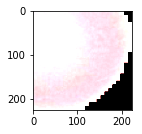

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted:- Uninfected
actual:- Uninfected


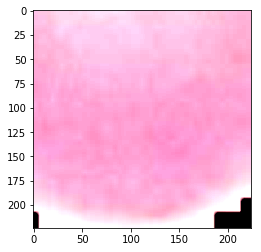

predicted:- Parasitized
actual:- Parasitized


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


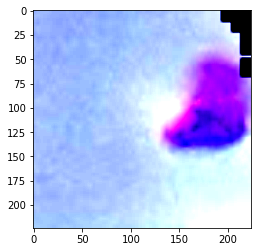

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted:- Parasitized
actual:- Parasitized


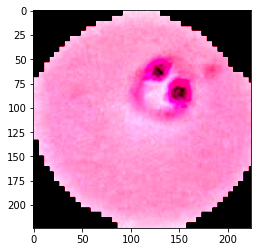

In [32]:
fig=plt.figure()
batch=0
index=0
model.eval()
with torch.no_grad():
  correct=0
  for k,(inputs, labels) in enumerate(dataloaders):
    if batch==1:
      break
    batch+=1  
    inputs=Variable(inputs).cuda()
    labels=Variable(labels).cuda()
    output=model(inputs)
    _, predicted=torch.max(output, 1)
    for i in range(0,4):
      
      ax=fig.add_subplot(2,2,k+1)
      #ax=axis('off')
      #ax.set_title('predicted_label {}'.format(class_names[predicted[i]]))
      print("predicted:-",class_names[predicted[i]])
      print("actual:-",class_names[labels[i]])
      img=inputs.cpu().data[i]
      img=img.numpy().transpose((1,2,0))
      #print(img.shape)
      mean=np.array([0.485,0.456,0.406])
      std=np.array([0.229,0.224,0.225])
      img1=std * img + mean
      #img1=np.clip(img1,0,1)
      #print(img1.shape)
      plt.imshow(img)
      plt.show()
      index+=1
      